In [2]:
import matplotlib.pyplot as plt
import numpy as np
import csv

f = open('country_vaccinations.csv', 'r', encoding='cp949')
data = csv.reader(f)
next(data)
max_vac=0
max_date=''
min_vac=999999
min_date=''
for row in data:
    if row[7]=='': row[7]=0
    row[7] = float(row[7])

    if max_vac<row[7]:
        max_vac=row[7]
        max_date=row[2]
    if min_vac>row[7]:
        min_vac=row[7]
        min_date=row[2]
print(f'가장 많은 접종날짜={max_date}, 적은 접종날짜={min_date}')

가장 많은 접종날짜=2021-06-28, 적은 접종날짜=2021-02-22


In [22]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd

f = open('country_vaccinations.csv', 'r', encoding='cp949')
data = csv.reader(f)
next(data)
dic={} # '백신' = [나라 리스트(중복x)]

for row in data:
    vaList = row[12].split(', ')
    cont = row[0]

    for v in vaList:
        if v in dic:
            if cont in dic[v] : pass
            else: dic[v].append(cont)
        else:
            dic[v]=[cont]



index = []
col=[]
for key, val in dic.items():
    index.append(key)
    col.append(len(val))

for i in range(len(index)):
    for j in range(len(index)):
        if col[i]>col[j]:
            temp = col[i]
            col[i]=col[j]
            col[j]=temp
            temp=index[i]
            index[i]=index[j]
            index[j]=temp

df = pd.DataFrame(col, index = index, columns=['number'])
df

,number
Oxford/AstraZeneca,183
Pfizer/BioNTech,158
Sinopharm/Beijing,90
Moderna,90
Johnson&Johnson,89
Sputnik V,58
Sinovac,51
Novavax,11
Covaxin,9
Sputnik Light,8


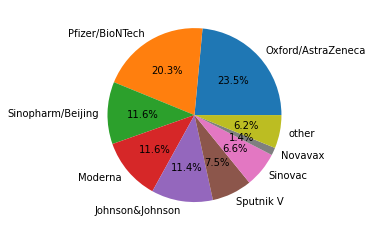

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd

f = open('country_vaccinations.csv', 'r', encoding='cp949')
data = csv.reader(f)
next(data)
dic={} # '백신' = [나라 리스트(중복x)]

for row in data:
    vaList = row[12].split(', ')
    cont = row[0]

    for v in vaList:
        if v in dic:
            if cont in dic[v] : pass
            else: dic[v].append(cont)
        else:
            dic[v]=[cont]


index = []
col=[]
for key, val in dic.items():
    index.append(key)
    col.append(len(val))

for i in range(len(index)):
    for j in range(len(index)):
        if col[i]>col[j]:
            temp = col[i]
            col[i]=col[j]
            col[j]=temp
            temp=index[i]
            index[i]=index[j]
            index[j]=temp
ind=0
for i in range(len(col)):
    if col[i]<10:
        ind=i
        break

otherNum=0
for i in range(ind, len(col)):
    otherNum+=col[i]
del col[ind:]
del index[ind:]

col.append(otherNum)
index.append('other')

s = sum(col)
for i in range(len(col)):
    col[i]/=s

plt.pie(col, labels=index, autopct='%.1f%%')
plt.show()